<a href="https://colab.research.google.com/github/rts1988/Duolingo_spaced_repetition/blob/main/Duolingo_lexemes_charIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import bz2
import pickle
import _pickle as cPickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

def compressed_pickle(title, data):  # do not add extension in filename
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
  cPickle.dump(data, f)

path_name = '/content/drive/MyDrive/'

Mounted at /content/drive


In [2]:
q1lexemes = decompress_pickle(path_name+"q1_lexeme_features.pbz2")

In [3]:
q1lexemes_chgrams = q1lexemes.drop(['index','learning_language','lexeme_string','lemma_form','pos','modstrings'],axis=1)
q1lexemes_chgrams

,lexeme_id,surface_form,sf_length,mod_*gndr,mod_*numb,mod_*pers,mod_@compound_past,mod_@cond_perfect,mod_@det:a_le,mod_@det:de_le,...,êt,ête,ía,ían,ías,ín,ît,ña,ño,ón
0,73eecb492ca758ddab5371cf7b5cca32,bajo,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,c84476c460737d9fb905dca3d35ec995,niños,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512787,0.0
2,1a913f2ded424985b9c02d0436008511,leo,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,38b770e66595fea718366523b4f7db3f,libro,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4bdb859f599fa07dd5eecdab0acc2d34,a,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12155,822db15e4e056837f908d47692f6969e,ajuda,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12156,aa25ea9dc156919749f444521720432c,conférence,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12157,3db97fbbdd0d4e08b8248b6219a86e4b,liens,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12158,8b53845a67433bd62179e23bcb88b5c3,foi,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
q1lexemes_chgrams = q1lexemes_chgrams.drop([col for col in q1lexemes_chgrams.columns if col.startswith('mod_')],axis=1)

In [5]:
q1lexemes_chgrams =q1lexemes_chgrams.drop(['num_tokens','num_accents','num_spchar'],axis=1)

In [6]:
q1lexemes_chgrams.head()

,lexeme_id,surface_form,sf_length,ab,aba,abaj,abe,abi,abl,abla,...,êt,ête,ía,ían,ías,ín,ît,ña,ño,ón
0,73eecb492ca758ddab5371cf7b5cca32,bajo,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,c84476c460737d9fb905dca3d35ec995,niños,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512787,0.0
2,1a913f2ded424985b9c02d0436008511,leo,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,38b770e66595fea718366523b4f7db3f,libro,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4bdb859f599fa07dd5eecdab0acc2d34,a,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Replacing TFIDF vectors with count vectors. (Will be calculating idf separately)

In [7]:
q1lexemes_chgrams.loc[:,'ab':] = np.where(q1lexemes_chgrams.loc[:,'ab':]>0,1,0)

Inverse word frequency of character gram: (analog of idf)

In [8]:
chgrams_idf = q1lexemes_chgrams.loc[:,'ab':].sum(axis=0).apply(lambda x: 1/(x+1))

More rare sequences of characrters:

In [9]:
chgrams_idf.sort_values(ascending=False).head(10)

gir     0.125000
avan    0.125000
veme    0.125000
meri    0.125000
cias    0.125000
empo    0.125000
oule    0.125000
mode    0.125000
ppar    0.111111
bé      0.111111
dtype: float64

More common sequences of characters:

In [10]:
chgrams_idf.sort_values(ascending=True).head(10)

en    0.001093
re    0.001147
er    0.001185
es    0.001236
nt    0.001337
te    0.001425
on    0.001618
ar    0.001678
an    0.001718
co    0.001828
dtype: float64

The lower the IDF, the more common the character sequence is. 

calculating sum of chgrams_idf series with the lexemes dataset: dot product of q1lexemes_chgrams.loc[:,'ab'] with chgrams_idf. 

In [11]:
q1lexemes_idfcounts = np.multiply(np.array(chgrams_idf).reshape((1,chgrams_idf.shape[0])),np.array(q1lexemes_chgrams.loc[:,'ab':]))

In [12]:
q1lexemes['idfsum'] = pd.Series(q1lexemes_idfcounts.sum(axis=1))

In [13]:
q1lexemes['idfsum_normalized'] = pd.Series(q1lexemes_idfcounts.sum(axis=1))/q1lexemes['sf_length']

In [14]:
q1lexemes.head()

,index,lexeme_id,learning_language,lexeme_string,surface_form,lemma_form,pos,modstrings,sf_length,mod_*gndr,...,ía,ían,ías,ín,ît,ña,ño,ón,idfsum,idfsum_normalized
0,7,73eecb492ca758ddab5371cf7b5cca32,es,bajo/bajo<pr>,bajo,bajo,pr,[],4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.206281,0.051570
1,20,c84476c460737d9fb905dca3d35ec995,es,niños/niño<n><m><pl>,niños,niño,n,"[m, pl]",5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.512787,0.0,0.063342,0.012668
2,21,1a913f2ded424985b9c02d0436008511,es,leo/leer<vblex><pri><p1><sg>,leo,leer,vblex,"[pri, p1, sg]",3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.043981,0.014660
3,22,38b770e66595fea718366523b4f7db3f,es,libro/libro<n><m><sg>,libro,libro,n,"[m, sg]",5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.405874,0.081175
4,23,4bdb859f599fa07dd5eecdab0acc2d34,es,a/a<pr>,a,a,pr,[],1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [45]:
q1lexemes_chgrams_sub =q1lexemes[['lexeme_id','idfsum','idfsum_normalized','surface_form','sf_length']]

In [16]:
datadfq1 = decompress_pickle(path_name+"Unseen_words_training_set.pbz2") 

In [46]:
datadfq1_sub = datadfq1[['p_recall','session_seen','lexeme_id']]

In [47]:
datadfq1_chidf = pd.merge(left = datadfq1_sub,right =q1lexemes_chgrams_sub,left_on='lexeme_id',right_on = 'lexeme_id',how="left")

In [48]:
datadfq1_chidf.head()

,p_recall,session_seen,lexeme_id,idfsum,idfsum_normalized,surface_form,sf_length
0,1.0,1,73eecb492ca758ddab5371cf7b5cca32,0.206281,0.051570,bajo,4
1,1.0,1,73eecb492ca758ddab5371cf7b5cca32,0.206281,0.051570,bajo,4
2,1.0,2,c84476c460737d9fb905dca3d35ec995,0.063342,0.012668,niños,5
3,1.0,2,1a913f2ded424985b9c02d0436008511,0.043981,0.014660,leo,3
4,1.0,4,38b770e66595fea718366523b4f7db3f,0.405874,0.081175,libro,5


In [49]:
datadfq1_chidf['p_forgot_bin'] = np.where((1 - datadfq1_chidf['p_recall'])>0,1,0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


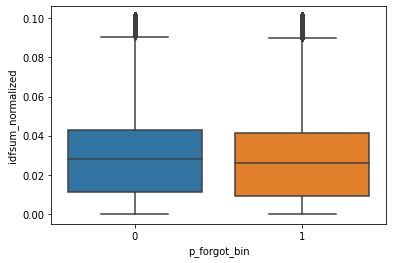

In [37]:
sns.boxplot(datadfq1_chidf.loc[datadfq1_chidf['session_seen']>0,'p_forgot_bin'],datadfq1_chidf.loc[datadfq1_chidf['session_seen']>0,'idfsum_normalized'])

In [22]:
q1lexemes_chgrams_sub.sort_values(by='idfsum',ascending=False).head(10)

,lexeme_id,idfsum,idfsum_normalized,surface_form
1380,24439365579cd076dfd25fbbaaafd683,1.134152,0.087242,professionals
11067,f959b802f2d8d1fb104b66b2ced00fd6,1.130351,0.075357,responsabilidad
10529,0e4150a5a21c53e1e9bcc270f0f7d0f5,1.114609,0.079615,reconnaissance
7038,30f75013bac2073fff71a80430f37c62,1.062213,0.075872,responsabilità
10579,80f8f2beb4333142e54f9722616ad738,1.038075,0.079852,connaissances
5547,5f508943f3d25a9ab9f00559c88965f9,1.034910,0.073922,principalement
5576,92555d8c56e99f9b27fdb068fa93fb8c,1.002964,0.071640,responsabilité
9739,c4eee1879c66cb4ea1a99ee49367ed94,0.991127,0.076241,posibilidades
883,eda1a3a62f976e7ad1c94e8a84950f02,0.984579,0.082048,professional
3468,cf06410c4038d71f49a3562a0d7f9b65,0.969822,0.088166,principales


In [23]:
q1lexemes_chgrams_sub.loc[q1lexemes_chgrams_sub['idfsum']>0,:].sort_values(by='idfsum',ascending=True).head(20)

,lexeme_id,idfsum,idfsum_normalized,surface_form
120,4d77de913dc3d65f1c9fac9d1c349684,0.001093,0.000546,en
1303,44208615c9076b387d27b5d510bb0a49,0.001093,0.000546,en
2351,a7c3836fb10b9610cab3c5174a1a7f0c,0.001093,0.000546,en
9957,27cfd8d77fdb30401122195e15985476,0.001147,0.000287,sûre
10956,0b019cb27fb4336496a38346dadae717,0.001147,0.000287,reçu
645,b1a71481e27138dc37501f2cbde775fc,0.001236,0.000618,es
17,54ed4cf41cbbae2ce97ddda174b5be84,0.001236,0.000618,es
538,b909b9ba214e56b5ba25c369d05ecd80,0.001236,0.000309,cães
5186,6137b612a2f98957ac3426186fb58825,0.001425,0.000712,te
105,ab724af62c7e36266ef3b66766d47489,0.001425,0.000712,te


In [24]:
q1lexemes_chgrams_sub.loc[q1lexemes_chgrams_sub['idfsum']>0.06,:].sort_values(by='idfsum',ascending=True).head(20)

,lexeme_id,idfsum,idfsum_normalized,surface_form
9668,d49944a5cb140f78125039d666e92bfc,0.060193,0.010032,ônibus
10422,498c944d0758b5743764c59b09339b67,0.060389,0.015097,haut
2190,d3e49d959b6673640358082151d38077,0.060389,0.015097,haut
9135,af260d5e727488ee29869027c14cd615,0.060480,0.010080,número
9,605a1c36da2cf22706eaad95b0b7eeee,0.060710,0.015178,niño
6323,252853798808dbbb25d21ef932704484,0.060793,0.012159,venez
9939,2ebe8c6b41b384db959e0cfed5f4ad0d,0.060793,0.012159,venez
6402,404a39ec95413d40d2f9a89e1e5e43f5,0.060809,0.015202,hand
9672,308c6db9ddbd35ba17ac9b5cfe57531b,0.060966,0.020322,sai
11316,c548975868f9a9baa0ced8c1f802c4fc,0.060986,0.015247,port


In [31]:
datadfq1_chidf['idfsum'].max()

1.1341515764683114

In [50]:
datadfq1_chidf['binned_idfsum'] = pd.cut(datadfq1_chidf['idfsum'],bins=11)

In [51]:
meanp_chidf = datadfq1_chidf.groupby('binned_idfsum')['p_forgot_bin'].mean()
meanp_chidf = meanp_chidf.reset_index()
meanp_chidf['binned_idfsum_mid'] = meanp_chidf['binned_idfsum'].apply(lambda x: x.mid)

In [52]:
datadfq1_chidf['binned_idfsum_n'] = pd.cut(datadfq1_chidf['idfsum_normalized'],bins=11)
meanp_chidf_n = datadfq1_chidf.groupby('binned_idfsum_n')['p_forgot_bin'].mean()
meanp_chidf_n = meanp_chidf_n.reset_index()
meanp_chidf_n['binned_idfsum_n_mid'] = meanp_chidf_n['binned_idfsum_n'].apply(lambda x: x.mid)

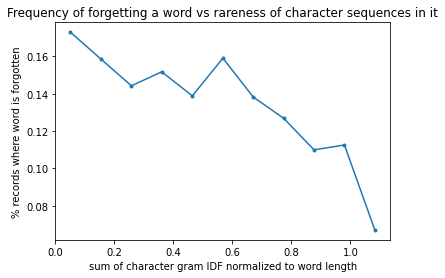

In [53]:
plt.figure()
plt.plot(meanp_chidf['binned_idfsum_mid'],meanp_chidf['p_forgot_bin'],'.-')
plt.xlabel("sum of character gram IDF normalized to word length")
plt.ylabel("% records where word is forgotten")
plt.title("Frequency of forgetting a word vs rareness of character sequences in it")
plt.show()

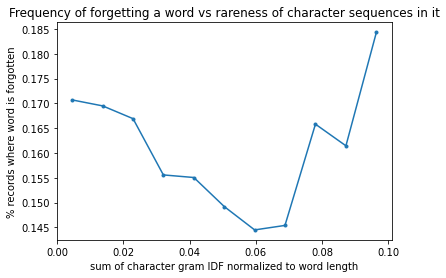

In [54]:
plt.figure()
plt.plot(meanp_chidf_n['binned_idfsum_n_mid'],meanp_chidf_n['p_forgot_bin'],'.-')
plt.xlabel("sum of character gram IDF normalized to word length")
plt.ylabel("% records where word is forgotten")
plt.title("Frequency of forgetting a word vs rareness of character sequences in it")
plt.show()

A different way to look at it:

In [55]:
datadfq1_chidf.head()

,p_recall,session_seen,lexeme_id,idfsum,idfsum_normalized,surface_form,sf_length,p_forgot_bin,binned_idfsum,binned_idfsum_n
0,1.0,1,73eecb492ca758ddab5371cf7b5cca32,0.206281,0.051570,bajo,4,0,"(0.206, 0.309]","(0.0459, 0.0551]"
1,1.0,1,73eecb492ca758ddab5371cf7b5cca32,0.206281,0.051570,bajo,4,0,"(0.206, 0.309]","(0.0459, 0.0551]"
2,1.0,2,c84476c460737d9fb905dca3d35ec995,0.063342,0.012668,niños,5,0,"(-0.00113, 0.103]","(0.00918, 0.0184]"
3,1.0,2,1a913f2ded424985b9c02d0436008511,0.043981,0.014660,leo,3,0,"(-0.00113, 0.103]","(0.00918, 0.0184]"
4,1.0,4,38b770e66595fea718366523b4f7db3f,0.405874,0.081175,libro,5,0,"(0.309, 0.412]","(0.0734, 0.0826]"


In [72]:
sf2meanp_idfsum = datadfq1_chidf.loc[datadfq1_chidf['sf_length'].isin(range(0,3))].groupby('binned_idfsum')['p_forgot_bin'].mean()
sf2meanp_idfsum = sf2meanp_idfsum.reset_index()
sf2meanp_idfsum['binned_idfsum_mid'] = sf2meanp_idfsum['binned_idfsum'].apply(lambda x: x.mid)

In [76]:
sf7meanp_idfsum = datadfq1_chidf.loc[datadfq1_chidf['sf_length'].isin(range(4,10))].groupby('binned_idfsum')['p_forgot_bin'].mean()
sf7meanp_idfsum = sf7meanp_idfsum.reset_index()
sf7meanp_idfsum['binned_idfsum_mid'] = sf7meanp_idfsum['binned_idfsum'].apply(lambda x: x.mid)

In [77]:
sf10meanp_idfsum = datadfq1_chidf.loc[datadfq1_chidf['sf_length'].isin(range(10,13))].groupby('binned_idfsum')['p_forgot_bin'].mean()
sf10meanp_idfsum = sf10meanp_idfsum.reset_index()
sf10meanp_idfsum['binned_idfsum_mid'] = sf10meanp_idfsum['binned_idfsum'].apply(lambda x: x.mid)

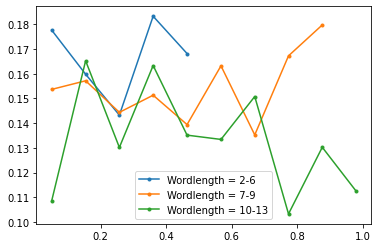

In [79]:
plt.figure()
plt.plot(sf2meanp_idfsum['binned_idfsum_mid'],sf2meanp_idfsum['p_forgot_bin'],'.-',label = "Wordlength = 2-6")
plt.plot(sf7meanp_idfsum['binned_idfsum_mid'],sf7meanp_idfsum['p_forgot_bin'],'.-',label = "Wordlength = 7-9")
plt.plot(sf10meanp_idfsum['binned_idfsum_mid'],sf10meanp_idfsum['p_forgot_bin'],'.-',label = "Wordlength = 10-13")
plt.legend()
plt.show()

Overall the only trend is that shorter words are forgotten more often, which is confirmed int he graph below. 

In [201]:
datasflen = pd.merge(left= datadfq1[['lexeme_id','p_recall']],right = q1lexemes[['lexeme_id','sf_length']],how="left",left_on = 'lexeme_id',right_on='lexeme_id')

In [204]:
datasflen.head()

,lexeme_id,p_recall,sf_length
0,73eecb492ca758ddab5371cf7b5cca32,1.0,4
1,73eecb492ca758ddab5371cf7b5cca32,1.0,4
2,c84476c460737d9fb905dca3d35ec995,1.0,5
3,1a913f2ded424985b9c02d0436008511,1.0,3
4,38b770e66595fea718366523b4f7db3f,1.0,5


In [208]:
datasflen['p_forgot_bin'] = np.where(1 - datasflen['p_recall']>0,1,0)

In [209]:
meanp_sflen = datasflen.groupby('sf_length')['p_forgot_bin'].mean()

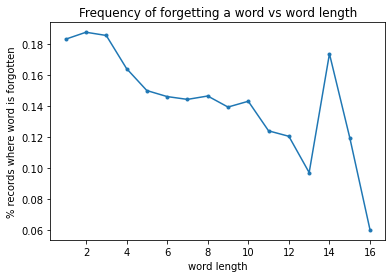

In [213]:
plt.figure()
plt.plot(meanp_sflen.index,meanp_sflen,'.-')
plt.xlabel("word length")
plt.ylabel("% records where word is forgotten")
plt.title("Frequency of forgetting a word vs word length")
plt.show()

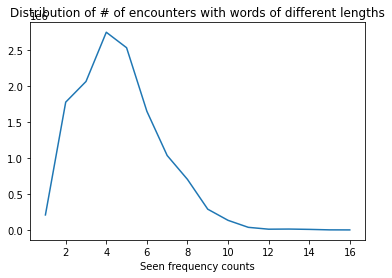

In [83]:
plt.figure()
plt.title("Distribution of # of encounters with words of different lengths")
plt.xlabel("Word length")
plt.xlabel("Seen frequency counts")
plt.plot(datadfq1_chidf.groupby('sf_length')['session_seen'].sum())
plt.show()

Maybe the longer words come later in the lessons, and are therefore only being seen by the more studious learners? Or better performers are more likely to stick with the program long enough to get to the longer words?

In [215]:
q1lexemes.loc[q1lexemes['sf_length']==14,'surface_form'].head(3)

1319    transportation
1921    estadounidense
2302    necesariamente
Name: surface_form, dtype: object

Looking at num accents

Maybe because it is multiple choice?

In [ ]:
q1lexemes_chgrams.loc[:,'ab':] = np.where(q1lexemes_chgrams.loc[:,'ab':]>0,1,0)

In [ ]:
chgram_freq = q1lexemes_chgrams.sum(axis=0)

In [ ]:
chgram_idf = chgram_freq.apply(lambda x: 1/(x+1) if type(x)!=str else x)

In [ ]:
chgram_idf.head(10)

lexeme_id       73eecb492ca758ddab5371cf7b5cca32c84476c460737d...
surface_form    bajoniñosleolibroaleequéquieresellosniñoescrib...
num_tokens                                               0.000082
num_accents                                              0.000894
num_spchar                                               0.017241
ab                                                       0.006757
aba                                                      0.023256
abaj                                                     0.111111
abe                                                      0.076923
abi                                                      0.066667
dtype: object

In [ ]:
plt.plot(chgram_idf.loc['ab':]